In [5]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/CVD_Vital_SIgns.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Accuracy: 0.9546229228802727

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.92      1156
           1       1.00      0.94      0.97      3538

    accuracy                           0.95      4694
   macro avg       0.92      0.97      0.94      4694
weighted avg       0.96      0.95      0.96      4694


Confusion Matrix:
 [[1156    0]
 [ 213 3325]]


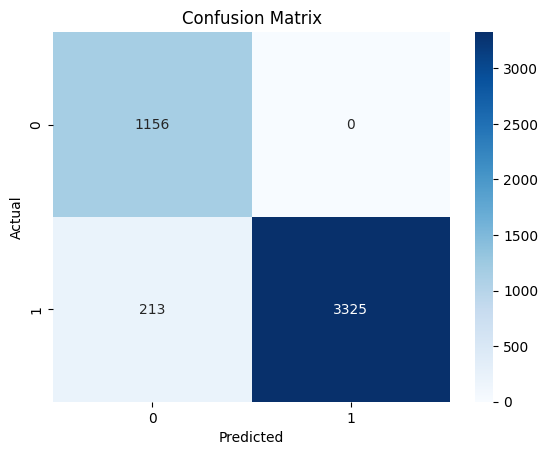

In [9]:


# STEP 3: Preprocessing
# Drop IDs (not useful for prediction)
# df = df.drop(['subject_id', 'icustay_id'], axis=1)

# Split features and target
X = df.drop('Label', axis=1)
y = df['Label']

# STEP 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# STEP 5: Train Decision Tree
model = DecisionTreeClassifier(max_depth=3, random_state=40)
model.fit(X_train, y_train)

# STEP 6: Predictions & Evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Optional: Visualize Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
